# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [81]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [82]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tocopilla
Processing Record 2 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 1 | namatanai
Processing Record 4 of Set 1 | upernavik
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | xingcheng
Processing Record 7 of Set 1 | harnosand
Processing Record 8 of Set 1 | hlotse
Processing Record 9 of Set 1 | nakamura
Processing Record 10 of Set 1 | kapaa
Processing Record 11 of Set 1 | palmer
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | sibolga
Processing Record 15 of Set 1 | tautira
Processing Record 16 of Set 1 | kailua
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | dingle
Processing Record 20 of Set 1 | gravdal
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | attawapiskat
City not found

In [83]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          575
Lat           575
Lng           575
Max Temp      575
Humidity      575
Cloudiness    575
Wind Speed    575
Country       575
Date          575
dtype: int64

In [84]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tocopilla,-22.0920,-70.1979,23.02,77,29,0.96,CL,1675567152
1,namatanai,-3.6667,152.4333,28.69,72,86,1.86,PG,1675567240
2,upernavik,72.7868,-56.1549,-24.32,100,99,2.10,GL,1675567240
3,punta arenas,-53.1500,-70.9167,12.06,66,0,12.35,CL,1675567240
4,xingcheng,40.6167,120.7167,3.28,42,61,4.54,CN,1675567241


In [85]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [86]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tocopilla,-22.0920,-70.1979,23.02,77,29,0.96,CL,1675567152
1,namatanai,-3.6667,152.4333,28.69,72,86,1.86,PG,1675567240
2,upernavik,72.7868,-56.1549,-24.32,100,99,2.10,GL,1675567240
3,punta arenas,-53.1500,-70.9167,12.06,66,0,12.35,CL,1675567240
4,xingcheng,40.6167,120.7167,3.28,42,61,4.54,CN,1675567241


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

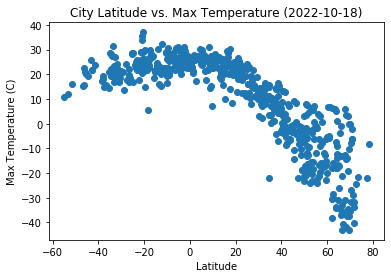

In [87]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
#plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

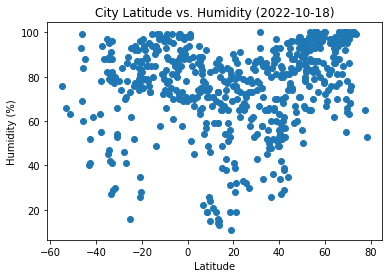

In [88]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
#plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

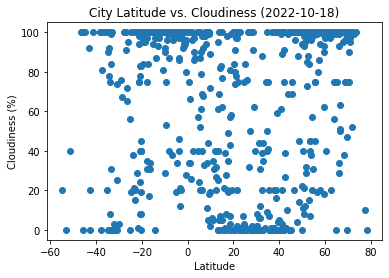

In [89]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
#plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

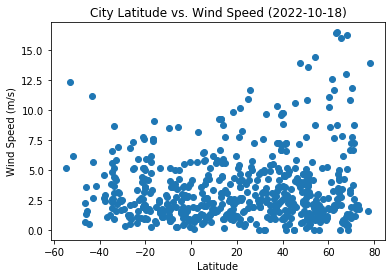

In [90]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")

# Save the figure
#plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [162]:
# Define a function to create Linear Regression plots
def lr(x_column, y_column):
    x_values = x_column
    y_values = y_column
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    left, right = plt.xlim()
    #down, up = plt.ylim()
    correlation = st.pearsonr(x_values,y_values)
    if left < -10:
        plt.annotate(line_eq,(-50,12),fontsize=15,color="red")
    else:
        plt.annotate(line_eq,(45,10),fontsize=15,color="red")
    print(f"The r-value is: {correlation[0]}")


In [138]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,upernavik,72.7868,-56.1549,-24.32,100,99,2.10,GL,1675567240
4,xingcheng,40.6167,120.7167,3.28,42,61,4.54,CN,1675567241
5,harnosand,62.6323,17.9379,-16.00,83,100,7.65,SE,1675567241
7,nakamura,32.9833,132.9333,11.51,34,35,1.03,JP,1675567242
8,kapaa,22.0752,-159.3190,24.18,82,75,8.23,US,1675567242


In [93]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tocopilla,-22.0920,-70.1979,23.02,77,29,0.96,CL,1675567152
1,namatanai,-3.6667,152.4333,28.69,72,86,1.86,PG,1675567240
3,punta arenas,-53.1500,-70.9167,12.06,66,0,12.35,CL,1675567240
6,hlotse,-28.8718,28.0450,13.71,84,67,0.29,LS,1675567241
10,puerto ayora,-0.7393,-90.3518,24.75,98,80,0.89,EC,1675567078


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8728435676768691


Text(0, 0.5, 'Maximum Temperature (C)')

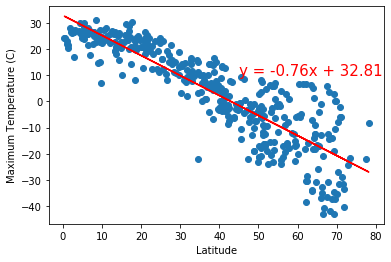

In [166]:
# Linear regression on Northern Hemisphere
lr(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (C)')

The r-value is: 0.41581485692581205


Text(0, 0.5, 'Maximum Temperature (C)')

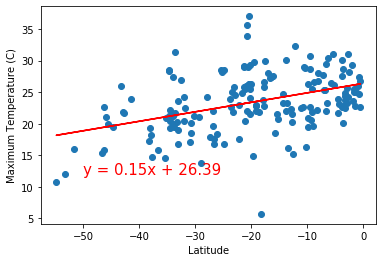

In [167]:
# Linear regression on Southern Hemisphere
lr(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (C)')

**Discussion about the linear relationship:** 
(Throughout this analysis, when I mention "increase in latititude in the Southern hemisphere", I'm referring to the latitudes going from -50 to 0 degrees and not the opposite).

For the Northern Hemisphere, there is a negative relationship between Latitude and Maximum temperature (C) because as latitude increases, temperature seems to decrease. Geographically, high latitude regions in the Northern Hemisphere comprise of the Arctic Circle and hence this relationship makes sense - as one approaches areas of higher latitudes (northern regions of the Northern Hemisphere), the temperature begins to drop. The r-value for this correlation is -0.87 where the minus sign signifies the negative relationship between the two variables and the value suggests as a strong correlation. In regards to the regression equation, the slope can be interpreted as the drop of temperature for each degree increase in latitude which means that for every one degree increase in temperature, the temperature is predicted to drop by -0.76 C.
In contrast, for the Southern Hemisphere, there is a positive relationship between Latitude and Maximum temperature (C) since as latitude increases so does the temperature. The values on the x-axis indicate moving towards the equator accompanied by an increase in temperature. This makes sense as the equatorial region are directly hit by sunlight and translates to higher temperatures. Furthermore, the r-values of 0.42 explains a moderate correlation between the two variables in the positive direction. The regression equation highlights that with every one degree increase in the latitude in the Southern Hemisphere, there is a predicted 0.15 C increase in temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4195384317384133


Text(0, 0.5, 'Humidity (%)')

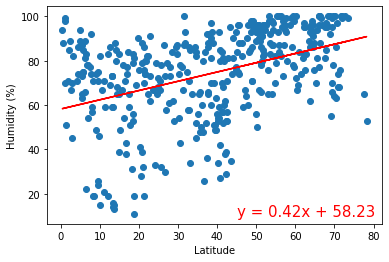

In [168]:
# Northern Hemisphere
lr(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

The r-value is: 0.32847790521967624


Text(0, 0.5, 'Humidity (%)')

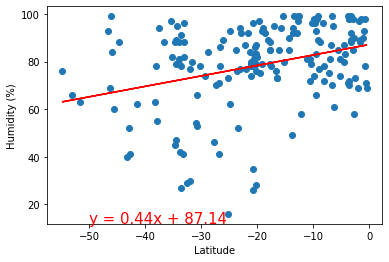

In [169]:
# Southern Hemisphere
lr(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

**Discussion about the linear relationship:** For both Northern and Southern Hemisphere, there seems to be an increase in humidity as there is an increase in latitude. There is a positive relationship between the two variables in both hemispheres as can be seen from the upward slopes and r-value, however this relationship is stronger in the Northern Hemisphere, with an r-value of 0.42 as compared to the Southern Hemisphere for which the r-value is 0.33. But the slope for both regressions equations is quite similar, indicating that with an increase of one degree latitude in the Northern as well as Southern hemisphere, there is an increase in humidity by 0.4%.  

Attempting to think critically about the range of latitude values, it is quite likely that not all latitudes 0 to ±90 degrees have been accounted for in this analysis since it might not have been possible to collect data from latitudes below -55 degrees for example. Hence, this dataset might not be completely representative of the actual values. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.25809660036928456


Text(0, 0.5, 'Cloudiness (%)')

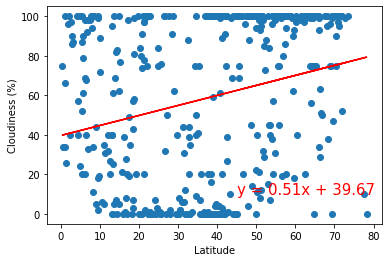

In [170]:
# Northern Hemisphere
lr(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

The r-value is: 0.3228158615128501


Text(0, 0.5, 'Cloudiness (%)')

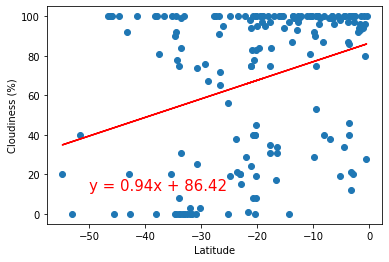

In [171]:
# Southern Hemisphere
lr(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

**Discussion about the linear relationship:** Similar to humidity, there is a positive relationship between latitude and percentage of cloudiness. There is a positive, low-moderate relationship between the two variables in both hemispheres as can be seen from the upward slopes and r-value, however this relationship is stronger in the Southern Hemisphere, with an r-value of 0.32 as compared to the Northern Hemisphere for which the r-value is 0.25. The slope for both regressions equations is also different. While the northern hemisphere has a slope of 0.51, the southern hemisphere has a slightly steeper slope of 0.94 indicating that with an increase of one degree latitude in the Northern hemisphere, there is an increase in cloudiness by 0.5% and in the Southern hemisphere, there will be an increase in cloudiness of 0.9 %. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.12133964798817468


Text(0, 0.5, 'Wind Speed (m/s)')

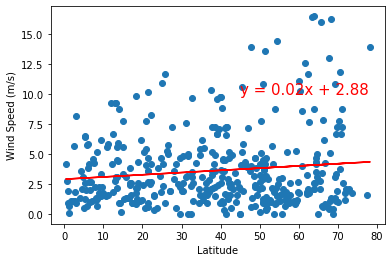

In [172]:
# Northern Hemisphere
lr(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

The r-value is: -0.22679137235953778


Text(0, 0.5, 'Wind Speed (m/s)')

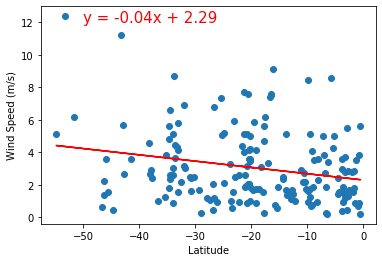

In [173]:
# Southern Hemisphere
lr(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')

**Discussion about the linear relationship:** There is a pretty weak correlation between latitude and wind speed in both hemispheres. In the Northern hemisphere, there is a positive relationship between the two variables, indicating the higher latitudes may predict higher wind speeds whereas in the Southern Hemisphere, there is a negative relationship between the variables, suggesting that higher latitudes here may predict lower wind speeds. However, both graphs essentially seem to suggest that the wind speed is higher away from the equator. The r-value for the correlation between wind speed and latitude in the Northern hemisphere is 0.12 and the r-value for the correlation between wind speed and latitude in the Southern hemisphere is -0.23 - both are weak associations. Lastly, the slopes for both regression equations are 0.02 and -0.04 respectively indicating that as the latitude increases by one degree, there is an increase in wind speed by 0.02 m/s in the northern hemisphere, towards the pole and in the southern hemisphere, there is a decrease in wind speed by -0.04 m/s towards the equator.